Fase 2: Data Understanding

Objetivo de la fase: El propósito de esta fase es explorar y entender el dataset de Goodreads, identificar posibles problemas como valores faltantes o anomalías, y comenzar a descubrir patrones iniciales que puedan influir en el análisis posterior. Además, se buscará evaluar la relación entre las variables clave (como el número de páginas, calificaciones y reseñas) para preparar el terreno de cara a las siguientes fases del proyecto.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Lo usaremos para el modelo de regresión
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.pipeline import Pipeline  # Aseguramos la importación de Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
csv_file_path = 'data/goodreads_data.csv'

In [17]:
if not os.path.exists(csv_file_path):
    kaggle.api.dataset_download_files('ishikajohari/best-books-10k-multi-genre-data', path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data


In [18]:
df = pd.read_csv(csv_file_path, delimiter=',', on_bad_lines='skip')

In [19]:
df.head(10)

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
5,5,The Little Prince,Antoine de Saint-Exupéry,A pilot stranded in the desert awakes one morn...,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,"1,924,063",https://www.goodreads.com/book/show/157993.The...
6,6,1984,George Orwell,The new novel by George Orwell is the major wo...,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,"4,201,429",https://www.goodreads.com/book/show/61439040-1984
7,7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,"4,839,642",https://www.goodreads.com/book/show/4671.The_G...
8,8,The Catcher in the Rye,J.D. Salinger,It's Christmas time and Holden Caulfield has j...,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,"3,315,881",https://www.goodreads.com/book/show/5107.The_C...
9,9,The Lord of the Rings,J.R.R. Tolkien,"One Ring to rule them all, One Ring to find th...","['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,"644,766",https://www.goodreads.com/book/show/33.The_Lor...


In [20]:
df.shape

(10000, 8)

In [21]:
df.columns

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')

In [22]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.50,7499.25,9999.0
Avg_Rating,10000.0,4.068577,0.335359,0.0,3.88,4.08,4.26,5.0


Matriz de Correlación

In [24]:
# Las columnas tienen que ser númericas
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['  num_pages'] = pd.to_numeric(df['  num_pages'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['text_reviews_count'] = pd.to_numeric(df['text_reviews_count'], errors='coerce')

# Calcula la matriz de correlación
correlation_matrix = df[['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count']].corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

KeyError: 'average_rating'

Existe una correlación entre ratings_count y text_reviews_count, esto significa que un alto numero de calificaciones esta asociado con un alto numero de reseñas, los lectores al hacer una calificación tambien son propensos a escribir una reseña.

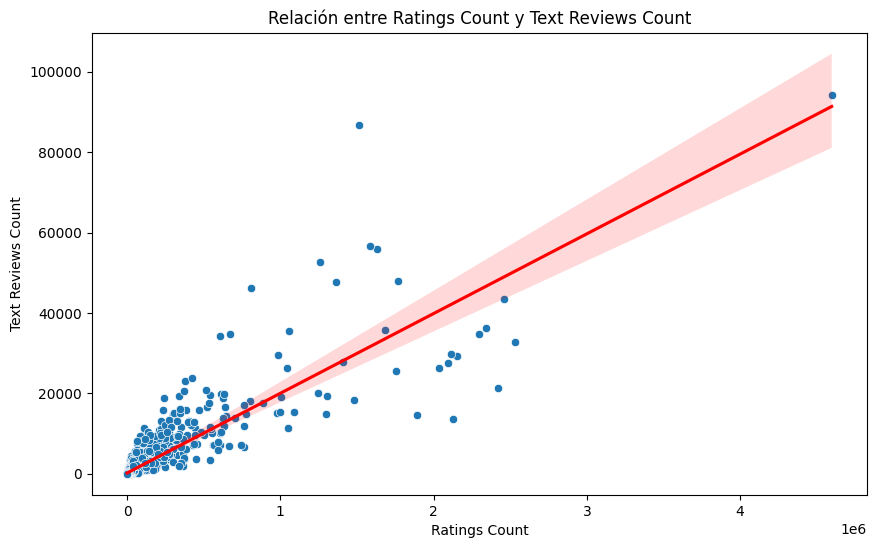

In [11]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings_count', y='text_reviews_count', data=df)
sns.regplot(x='ratings_count', y='text_reviews_count', data=df, scatter=False, color='red')
plt.title('Relación entre Ratings Count y Text Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.show()

Se confirma la alta correlación con la linea roja y el area sombreada, indicando una tendencia positiva.

In [12]:
#Verificamos valores faltantes en el dataset
total_missing = df.isnull().sum().sum()
print(f'Total de valores faltantes: {total_missing}')

Total de valores faltantes: 0


Histograma: Distribución de clasificaciones promedio

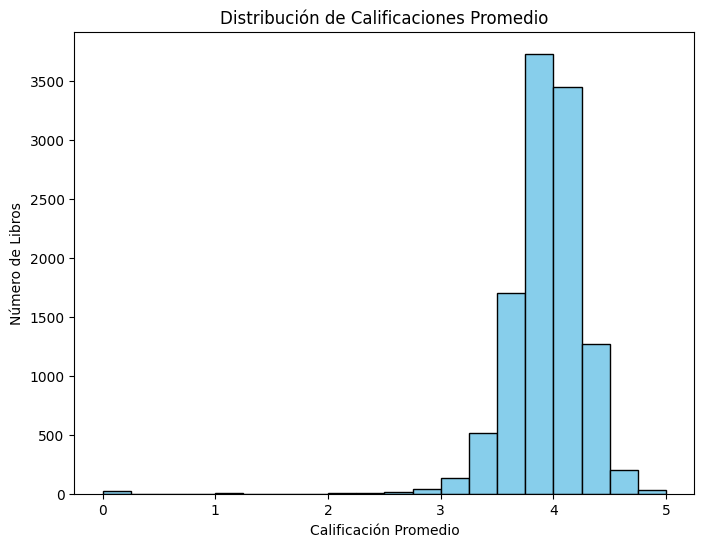

In [13]:
# Gráfico 1: Distribución de las calificaciones promedio (average_rating)
plt.figure(figsize=(8,6))
df['average_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Libros')
plt.grid(False)
plt.show()

La mayoria de los libros tienen una calificación promedio entre 3 a 4.5, lo que indica que el conjunto de libros esta bien valorado por los lectores.

Gráfico de dispersión

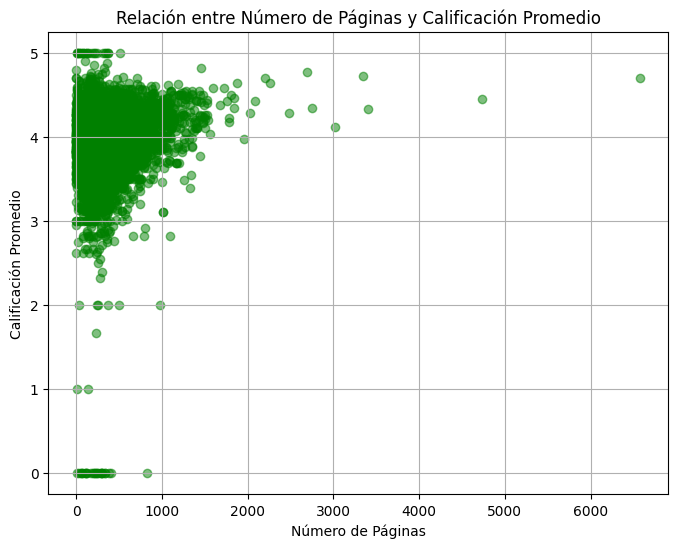

In [14]:
# Gráfico 2: Relación entre número de páginas y calificación promedio
plt.figure(figsize=(8,6))
plt.scatter(df['  num_pages'], df['average_rating'], alpha=0.5, color='green')
plt.title('Relación entre Número de Páginas y Calificación Promedio')
plt.xlabel('Número de Páginas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

La mayoria de cantidad de datos se encuentra entre 3 a 4.5 calificacion promedio y de menos de 1.500 numero de paginas.